In [41]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('../py')
from knn_classifier import KnnClassifier
from exp import *
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

# Include path to binaries on PATH variable
bin_path = os.path.join(os.path.dirname('../'))
os.environ['PATH'] = "{}:{}".format(bin_path, os.environ['PATH'])

with open('../data/train.csv') as f:
    lines = np.loadtxt(f, delimiter=',', dtype=np.uint8, skiprows=1)
    X = lines[:,1:]
    y = lines[:,0]
    lines = None

In [42]:
def train_sizes():
    rango_1000 = range(100, 1000, 100)
    rango_10000 = range(1000, 10000, 1000)
    rango_30000 = range(10000, 30000, 2000)
    rango_41990 = range(30000, 41990, 3000)
    rango = list(rango_1000) + list(rango_10000) + list(rango_30000) + list(rango_41990)
    rango.append(41990)
    return rango

def set_X_y_with_train_size(train_size, test_size=10, seed=0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=test_size, random_state=seed)
    for train_index, _ in sss.split(X, y):
        X_train = X[train_index]
        y_train = y[train_index]
        return X_train, y_train

def save_array(fname, arr):
    full_fname = '{}.npy'.format(fname)
    np.save(fname, arr)
    
def run_knn_with_k_alpha(k, alpha, X_train, y_train, cv_k=5, seed=0, n_iters=3):
    scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
    results = {'acc': [], 'f1': [], 'times': []}
    clf = KnnClassifier(k=k, alpha=alpha)
    cv = StratifiedKFold(n_splits=cv_k, random_state=seed)
    cv = list(cv.split(X_train, y_train))[:n_iters]
    res = cross_validate(clf, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    results['acc'].append(np.mean(res['test_acc']))
    results['f1'].append(np.mean(res['test_f1']))
    results['times'].append(np.mean(res['score_time']))
    return results
    
def run_knn_with_k_alpha_incrementing_train_size(k, alpha, cv=5):
    sizes = train_sizes()
    file_name = "exp3_k{}".format(k)
    results = []
    for size in sizes:
        print(file_name)
        X_train, y_train = set_X_y_with_train_size(size)
        assert(len(X_train) > 0)
        results.append(run_knn_with_k_alpha(k, alpha, X_train, y_train, cv))
        save_array(file_name, results)

In [12]:
run_knn_with_k_alpha_incrementing_train_size(1, 36)

exp3_k1
stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpave8a2xs... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324470 306171 237119 227237 211994 153589 128709 114154 106202 100428 93654.7 83914.5 77841.4 74389.5 63567.3 61911.4 56169.9 52157 48857.5 46065.1 40357.3 36382.3 35876.3 33292.9 30712.5 29615 29337.4 28350 25621 24494.2 23245.9 22183.4 21281.6 20380.9 19254.4 18305.9 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp0wjdy797... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305203 247064 217668 185780 162871 128983 121171 112565 100512 93261.7 82980.6 77624.9 65540 63069.2 54174.7 53426.2 48598.1 46069.2 44391.2 42291.4 41126.1 36581 33928.3 32593 31776.9 28848.9 28260.6 27216.9 24661.8 24057.4 23159.1 22429 20710.3 19988.6 19215.9 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp82yniv69... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 313973 309219 266535 216542 200301 188525 138059 118011 107625 101028 87943.2 81603 70626.6 68440.5 64687.6 56434.1 53105 50130.7 48651.9 43239.7 42847.8 38805 34593.2 32269.4 31879.6 29691.9 28094.5 26531.7 24762.4 24099.9 23324.7 22611 21062.8 19704.5 19430.4 18887.4 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpi4zxzkma... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324470 306171 237119 227237 211994 153589 128709 114154 106202 100427 93655 83914.5 77841.6 74389.4 63567.4 61911.3 56169.9 52157.1 48857.4 46065.2 40357.4 36381.9 35876.7 33292.8 30712.4 29615 29337.7 28349.8 25621 24494.2 23246 22183.2 21281.7 20381 19254.4 18305.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpnlr2x_ie... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305203 247064 217668 185781 162871 128983 121172 112565 100513 93261.4 82980.9 77624.7 65540 63069.2 54174.8 53426.4 48597.9 46069 44391.6 42291.1 41126.2 36581.1 33928.3 32593 31777 28848.9 28260.6 27217 24662.1 24057 23159.1 22429.1 20710.2 19988.9 19215.8 
Transformando dataset... listo.

stderr: Parámetro PC


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp09r3ni0j... listo.
Tamaño dataset: 320
Corriendo PCA... listo.
Autovalores: 338281 254944 233486 181347 178796 159290 117683 104265 91982.2 86432.4 79785.4 72066.7 67909.6 64031.3 59573.9 52339 51362.6 47224.6 41514.1 38418.1 36699.3 36315.8 34517.8 32364.4 31977.8 28471.5 26841.9 25704.9 25210.1 24282.3 23112.6 22047.7 21493.7 20678.8 19468.8 19010.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpvtijgmc5... listo.
Tamaño dataset: 317
Corriendo PCA... listo.
Autovalores: 356749 243726 232272 189843 182323 163748 118876 101219 95616.3 86378.8 79890.9 75920.7 68187.9 60929 57286.8 50088.2 48960.7 46914.8 42281.4 40715.6 38177.7 37327.6 36202.2 33274.8 31863.9 28816.5 28521.5 25944.6 25410.3 24698.3 24397.5 22564.7 21444 20439.4 19817.7 19029.6 
Transformando dataset... listo


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpiz2z_pbg... listo.
Tamaño dataset: 558
Corriendo PCA... listo.
Autovalores: 330729 244417 235833 179317 175880 147930 120546 105021 95032.4 89820.2 78631.4 72004 67289.5 62407.7 58956.4 53666.1 46548.6 45274.1 41549.5 38775.5 37141 36237.5 35705.7 33732.6 31022.1 28796.5 27953.8 26763.3 25197.3 24382.1 22622.3 21824.7 21026.3 19913.7 19522 19076.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmps4_wptxi... listo.
Tamaño dataset: 557
Corriendo PCA... listo.
Autovalores: 339574 248651 233334 183640 176934 149746 116894 96655.1 93702.4 90202.9 80398 72404.9 66302.6 61414.7 56374.6 52007 48687.8 45416.7 40416 38579.2 37301.6 35143.1 34082.5 32195.2 31729 29996.5 27104 26659.1 25071.7 23631.8 21971.1 21512.1 21046.4 19212.1 18627.4 18235 
Transformando dataset... listo.

stderr: 


exp3_k1
stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp1h7_zq0i... listo.
Tamaño dataset: 797
Corriendo PCA... listo.
Autovalores: 341226 244397 229471 182847 174375 148935 112912 100626 94387.2 89161.5 72584.9 67025.1 65128.7 60150.9 57856.5 51399.5 45105 44405.8 40363.2 38412.5 35951.7 35680.3 33264 31672.6 30227.1 29279 28291.3 27610.7 25255.2 24351.5 22659.7 21562.1 20983.2 19561.5 19155.5 18846.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpf8jj4349... listo.
Tamaño dataset: 800
Corriendo PCA... listo.
Autovalores: 333509 244776 230016 183100 169309 150095 115920 101414 93658.2 87750.6 73731.5 67101.1 62713.8 59201.2 57998.2 50622.1 47119.4 42704.4 41080.2 37781.2 37520.3 35285.7 33941.1 32508.4 30518.7 28405 27417.5 26583.9 25731.4 23780.9 23093.4 21812.4 20372.6 19731.4 19139.2 18656.5 
Transformando dataset...


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpnh6r37k5... listo.
Tamaño dataset: 2400
Corriendo PCA... listo.
Autovalores: 338581 241792 217332 188975 170046 152943 114467 98539.5 93486.2 85143.2 74568.2 69974.9 60259.7 58133 53756.1 51254 45116.7 43980.1 41233.2 40239.7 37932.3 34648.9 34100.9 31151.5 30511.7 28889.9 27227.3 26485.3 24893.9 23910.2 22773.3 22030.2 20774.4 20388.3 19123.7 18838.6 
Transformando dataset... listo.

exp3_k1
stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpa_ro58sj... listo.
Tamaño dataset: 3199
Corriendo PCA... listo.
Autovalores: 333934 246148 214399 185287 168435 151799 114395 97514.4 94812.6 84151.9 72465.4 69483.7 61737.3 58139.5 54428.9 52937.2 45915.9 43380.7 40705 38846.8 38287.1 35522.1 33118.4 31347.5 29933.6 28675.4 27191.7 26346.3 25595.1 23644.8 22628.3 21894 20746.7 19870.3 19256.3 18228.9 
Transformando datase


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpy6c6tgwu... listo.
Tamaño dataset: 4801
Corriendo PCA... listo.
Autovalores: 329080 242243 219381 183114 165963 150940 115925 97431.1 94547.6 82425.6 73454.5 69608.2 59723.4 57905.5 54638.1 51744.4 45932.8 43476.8 41676.2 40000.6 37366.6 34867 32304.2 31043.4 31099.8 28209.1 27145.3 26262.1 25799.7 23929.6 23051.8 22082.3 20686.4 20353.5 19915.5 18299.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpi69ks381... listo.
Tamaño dataset: 4796
Corriendo PCA... listo.
Autovalores: 328726 245386 215768 182680 167638 149290 115978 97369.4 93665.9 81417.3 72419.7 69814.1 57908.6 59091.4 53933.5 52291.3 45931.2 43395.9 41254.2 38764.1 37164.6 35379.7 32845.4 31033.8 30269.6 28468.2 27497.2 25830.5 25247.2 24106.4 22801.3 22268 21075.4 20544.8 19748.1 18565.1 
Transformando dataset...


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp64cwbah2... listo.
Tamaño dataset: 7200
Corriendo PCA... listo.
Autovalores: 335511 245140 214512 184865 169144 153380 115498 98226.2 94935.4 81483.8 72307.4 71077.7 59615.7 55858.3 53541.9 51279.4 45745.2 42877.7 40998.9 38817.8 37263.2 35213.1 32621.8 31207.4 30503 28574.7 27567.9 26579.8 25201.8 23608.2 22529 21756.9 20711.7 20453.5 19747.4 18693.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpa4e0gqtv... listo.
Tamaño dataset: 7197
Corriendo PCA... listo.
Autovalores: 331865 247134 214716 183296 166044 147199 114423 100931 94990.7 82382 73419.8 70744.3 58606.8 56785.4 53363.8 51621.9 45265.5 43297.4 41860.6 39314.6 37426.1 34681.9 32756.2 31173.8 30803.3 28321.7 27353 26567.7 25152.3 23718.3 22576.8 22225.2 20730.5 20404.5 19923.3 18549.3 
Transformando dataset... list


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp6dbh8jfv... listo.
Tamaño dataset: 11198
Corriendo PCA... listo.
Autovalores: 334974 246745 212474 183273 166663 150355 113720 97727.6 95363.1 80251 72596.5 70478.5 58899.6 57882.3 53169.4 51313.6 45683 43715.4 41096 39112.5 37135.6 35128.2 32494.2 30953.8 30997 28922.5 27848.3 26526.2 25175.1 23504.2 22325.3 21879.8 20742.3 20125.8 19590.8 18561.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpmkr88a0l... listo.
Tamaño dataset: 11201
Corriendo PCA... listo.
Autovalores: 335511 246244 213226 184778 168080 148782 113322 98644 93469.8 81335.8 72775.6 69913.4 58835.7 57670.4 53062.6 51656.3 45745.5 43203 40618 38731.4 37148.5 35567.8 32268 31139.2 30607.1 28980.8 27830.4 26359.9 25488.6 23546.9 22708.1 21822.8 20695.6 20265.8 19746.9 18627 
Transformando dataset... listo.

std


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp8h1xgq_7... listo.
Tamaño dataset: 16000
Corriendo PCA... listo.
Autovalores: 330315 246830 212607 183075 167142 149337 112873 98001.7 93703.5 80905 73270.2 71209.3 58702.8 57859.7 54097.7 51763.4 45705.6 43510.6 40734.8 39089.9 36891.2 35147.1 32690.9 30966 30852.7 28714.8 27934.3 26740.8 25193.7 23524.6 22615 22058.8 20781.8 20196.7 19479.9 18318.5 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpurttxvew... listo.
Tamaño dataset: 15998
Corriendo PCA... listo.
Autovalores: 334596 245018 211837 184295 169157 148577 112202 99365.7 95271.6 81165 72861.6 71020.7 58756.4 57736 53950.9 50958.1 45982.1 43870.9 40937.5 39347.3 37066.4 35229 32689.2 31255.5 30650.7 28611.3 28072.7 26602.4 25295.9 23704.3 22623 21989.8 20644.1 20231.9 19593.4 18545.7 
Transformando dataset... listo.



exp3_k1
stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpw5nkyfn_... listo.
Tamaño dataset: 20799
Corriendo PCA... listo.
Autovalores: 333948 245290 211766 183082 166883 148714 112901 98549.9 95822.4 80145.9 72005.3 70569.1 58946.3 58350 54107.7 51393.6 45415.3 43773.2 40771.5 39469.8 36838.3 34977.6 32841.3 31257.1 30720.1 28680.6 27727 26724.1 25232.5 23474.5 22422.9 21583.3 20598.5 20367.1 19489.7 18746.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpv5qzl_6x... listo.
Tamaño dataset: 20796
Corriendo PCA... listo.
Autovalores: 334110 246334 211854 184006 167788 148981 113056 99775.2 95463.7 80373.2 72430.7 70272.9 58521.6 57656.9 54530.3 51153 45339.4 44040.7 41247.5 39710.6 37042.5 34948.1 32882.3 31266.1 30440.3 28492.5 27862.9 26400.2 25087.2 23558.7 22598.6 21988.6 20719.7 20039.4 19423 18512.7 
Transformando data


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp8wl5sh05... listo.
Tamaño dataset: 24000
Corriendo PCA... listo.
Autovalores: 335171 246032 211255 184033 167355 148464 112032 99332 94831.5 80616.5 72426.1 70921.8 58338 58073.5 54121.9 50600.7 45852.7 43734.6 41141.3 39473.5 36583.3 34836.5 33050.7 30951.9 30782.2 28587 27853.9 26737.8 25129.2 23496.6 22615.9 21941.3 20456.3 20167.5 19297.1 18473.8 
Transformando dataset... listo.

exp3_k1
stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp49g8s4pg... listo.
Tamaño dataset: 26401
Corriendo PCA... listo.
Autovalores: 336418 246176 211639 183883 167592 147728 112429 98679.8 94995.9 81165.4 72074.1 70838.7 58249 58353.9 54524.5 50444 44962.1 43909.5 40608.4 39597.7 36906.5 34877.9 33105.8 31096.8 30409.2 28573.1 27563.2 26773.1 25338.4 23507.7 22576 22015.2 20595.4 20093.8 19364.2 18576.4 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpnqxcnozi... listo.
Tamaño dataset: 31196
Corriendo PCA... listo.
Autovalores: 333855 246715 210773 184190 168068 147754 112273 95226.2 99539.4 80819.8 71896.8 70586.3 58621.1 57985.4 54138.3 50840.4 45232.4 44411.4 40957.2 39552 36830 34707.5 32982.4 31247.4 30461.9 28772.2 27845.4 26730.1 25630.3 23602.4 22464.7 21917.2 20635.7 20042.1 19458.2 18471.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpofrv6gj4... listo.
Tamaño dataset: 31200
Corriendo PCA... listo.
Autovalores: 335028 245884 209794 184311 168304 148090 112303 99389.7 94655.3 80923.8 71962.4 71218.1 58669.8 57995 54271.8 50415.8 45146.5 44166.8 40711.7 39173.4 36787.3 34885.8 32951.2 30509.6 31179 28845.6 27798 26653.9 25302 23778 22821.6 21953 20525.9 20326.4 19343.3 18538.3 
Transformando dataset... listo.

e

ValueError: The sum of train_size and test_size = 42000, should be smaller than the number of samples 41999. Reduce test_size and/or train_size.

In [31]:
def run_knn_with_incrementing_size_and_k(k_offset, alpha, cv=5):
    sizes = train_sizes()
    file_name = "exp3_k_depending_size"
    results = []
    for size in sizes:
        X_train, y_train = set_X_y_with_train_size(size)
        assert(len(X_train) > 0)
        results.append(run_knn_with_k_alpha(k_offset+(0.12*size), alpha, X_train, y_train, cv))
        save_array(file_name, results)

In [32]:
run_knn_with_incrementing_size_and_k(0, 36)

stderr: Parámetro PCA = 1
Parámetro K = 12
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpwy81nf_5... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305203 247064 217668 185780 162872 128983 121171 112565 100512 93261.9 82980.8 77624.7 65539.8 63069.4 54174.7 53426.5 48597.8 46069 44391.5 42291.3 41126.2 36580.9 33928.4 32593 31777.1 28848.9 28260.4 27217.1 24662.1 24056.8 23159.3 22429.1 20710.3 19988.8 19215.8 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 12
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpjqmrb1cy... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324471 306170 237119 227237 211994 153589 128710 114154 106203 100427 93655.3 83914.4 77841.4 74389.7 63567.4 61911.3 56169.9 52157.1 48857.3 46065.2 40357.4 36382 35876.7 33292.7 30712.5 29614.9 29337.7 28349.7 25621 24494.3 23245.9 22183.3 21281.5 20381.1 19254.3 18305.9 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 12
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp588lagq_... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 313977 309215 266535 216543 200301 188526 138059 118010 107625 101028 87942.9 81603.4 70627.1 68440.1 64687.6 56434.1 53105.1 50130.6 48652 43239.2 42848.3 38805.1 34593.2 32268.9 31879.9 29691.9 28094.5 26531.6 24762.5 24099.8 23324.7 22611 21062.8 19704.5 19430.3 18887.5 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 12
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpyvza655x... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324471 306170 237118 227237 211995 153589 128709 114153 106203 100427 93654.8 83914.4 77841.8 74389.4 63567 61911.6 56169.9 52157.1 48857.4 46065.1 40357.4 36381.6 35877 33292.7 30712.3 29615.8 29337 28349.8 25620.9 24494.3 23246 22183.2 21281.5 20381.2 19254.3 18305.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 12
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp2fktk1rx... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305204 247064 217668 185781 162871 128983 121172 112565 100513 93261.5 82980.5 77625 65540 63069.1 54174.8 53426.1 48598 46068.9 44391.6 42291.5 41125.9 36581.1 33928.2 32593.1 31777 28848.6 28260.8 27217 24661.8 24057 23159.3 22429.1 20710.3 19988.8 19215.8 
Transformando dataset... listo.

stderr: Parámetr

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 24
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp8tgvlvdp... listo.
Tamaño dataset: 157
Corriendo PCA... listo.
Autovalores: 334873 265097 218886 212311 185992 160091 109998 105577 88490.3 82555.1 80908.2 74143.9 71560 64191.7 59613.5 52929.4 49738.3 46266.9 42825.1 40732 38334.7 37740.5 35937.5 35125.3 32889.5 31828.7 29573.4 28048.1 25942.4 24689.5 23173.1 22538.6 20688.8 20157.5 19888 18156 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 24
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp0z9nktdq... listo.
Tamaño dataset: 160
Corriendo PCA... listo.
Autovalores: 340996 241886 237962 210849 181230 162386 117681 104545 89802.4 87753.1 76278.1 74961.3 67939.9 63708.8 59099.6 54486.9 47904.1 46294.2 43380.1 40475.1 38166.2 34699.5 34435.5 32016.2 30269.8 29844 27498.8 26915.7 24922.2 23729.8 22625.9 22279.4 20910.5 19845.4 18584.9 18164.6 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 24
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpytmm9khx... listo.
Tamaño dataset: 157
Corriendo PCA... listo.
Autovalores: 334873 265097 218884 212312 185992 160091 109998 105577 88490.1 82554.8 80908.6 74143.6 71560.3 64191.7 59613.6 52929.2 49738.6 46266.7 42825.2 40731.8 37739 38336.2 35937.4 35125.4 32889.2 31828.9 29573.5 28048.1 25942.3 24689.7 23173.2 22538.4 20688.5 20157.8 19888.1 18156 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 24
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpra1z4pnn... listo.
Tamaño dataset: 159
Corriendo PCA... listo.
Autovalores: 326661 267257 243051 190723 186078 163042 117735 111553 94043.4 92677.7 79699.3 74847.9 69962 64015.5 60452.3 54479.2 50064.6 45567.7 44142.5 41832.2 40728.7 39211.8 33731.6 32523.9 31840.6 31621.7 29337.4 28864.3 26338.5 24365.8 23457.8 22706.8 22153.4 20958.3 19812.9 18702.4 
Transformando dataset... list


stderr: Parámetro PCA = 1
Parámetro K = 60
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpsmq3l0ty... listo.
Tamaño dataset: 400
Corriendo PCA... listo.
Autovalores: 345169 250070 238262 186709 177163 164206 113280 98787.9 92263.1 89527 80972.5 71711.9 65337.4 59989 59485.5 52868.3 50163.2 47025.1 40038.8 39143.5 37068.2 36568.5 34367.7 32850 29719.1 28967.6 26913.9 25959.5 25126.1 24156 22584.9 22003.2 21692 20929.4 19804.1 19064.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 60
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmprtxx3d_7... listo.
Tamaño dataset: 397
Corriendo PCA... listo.
Autovalores: 324709 243853 236929 175124 170357 157837 116597 97510.1 95231.9 87524.5 79951.5 75496.4 67312.8 61920.7 58771.6 54461.4 51843.2 44316.1 40408.5 39827.2 38119.9 36514.8 34221.6 32496.4 31831.8 29161.9 27963.5 26931.5 26180.6 24950.8 23843.2 23155.8 21586.5 20534.4 19413.6 18940.8 
Transformando dataset... listo


stderr: Parámetro PCA = 1
Parámetro K = 96
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpg3an02xk... listo.
Tamaño dataset: 637
Corriendo PCA... listo.
Autovalores: 339235 242549 234176 175679 172139 153835 117548 101992 92183.3 92072.8 77003 69939.2 65219.6 61345.2 59890.5 51109 48838.3 45470.1 40127 38310.7 36393.5 34598.1 33712 31775 30120.8 28610.6 27957.7 27108.8 25373.9 23348.4 22737.3 21474.7 20690.4 20281.4 19093.8 18495.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 96
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpupbvd1vj... listo.
Tamaño dataset: 637
Corriendo PCA... listo.
Autovalores: 340987 232386 228207 182642 174188 149269 118289 100452 89935 87202.8 72768.2 71477 66530.7 62254.2 58984.2 54293.6 48039.8 44149.9 41602.3 39147.8 38851 35094.4 33711.9 31177.9 30652 28611.2 27549.8 26358.7 25564 23901.8 23020.2 22113.5 21368.3 20150 19469.2 18789.5 
Transformando dataset... listo.

stderr: Par


stderr: Parámetro PCA = 1
Parámetro K = 240
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp_r698ep2... listo.
Tamaño dataset: 1597
Corriendo PCA... listo.
Autovalores: 338286 243153 224363 183577 171547 146438 116446 96063.7 93018.9 87207.8 76397 68099.1 58816.2 57925 54534.3 51650.9 46190.1 43141.6 40638 39863.4 37327.8 34884.2 34230.1 31020.3 30195.6 28833.5 27460.3 26638.2 25970.8 24041.7 22801.7 21897.2 20968.8 20581.9 19290 18779.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 240
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpbm1qux41... listo.
Tamaño dataset: 1596
Corriendo PCA... listo.
Autovalores: 338886 239521 216733 181324 171225 148677 110913 102378 91045.9 84368.5 74211.6 69971.1 60471.6 55682.3 54228.7 50325.9 45069 43375.4 40179.8 38861.2 37878.6 35220.4 33867.5 31233.7 30796.5 29434.1 27500.7 26918.1 24979.8 24462.4 22665.3 21457.3 21148.3 20502.9 18935.9 18002.9 
Transformando dataset... li


stderr: Parámetro PCA = 1
Parámetro K = 480
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp9ieqyh8m... listo.
Tamaño dataset: 3198
Corriendo PCA... listo.
Autovalores: 333128 245843 214484 185632 166109 148407 114414 96989 95216.9 83308.4 74322.7 71720.6 60002 57943.1 54039 51705 44623.8 44044.3 41603 39583 37826.2 35458.8 33200 31701.3 30975.7 28884.3 27342.7 26568.6 25380.8 24119.5 23132 22186 21334.6 20533.3 19928.4 18389.5 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 600
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp3hvb0q3f... listo.
Tamaño dataset: 4001
Corriendo PCA... listo.
Autovalores: 335664 245911 217070 179546 169745 148383 115559 96119.2 94307 82641.5 73664.2 70690.2 59022.5 57316.8 53499.3 51459.6 45330.8 43260.4 41435 39850.4 38632.9 34871.4 33107.1 31261.7 30216 28911.8 26938.8 26315 25438.2 24101.2 22637.4 22314.9 20440.8 20042.2 19362.9 18379.7 
Transformando dataset... listo.

stderr: P


stderr: Parámetro PCA = 1
Parámetro K = 840
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpruvzcdjy... listo.
Tamaño dataset: 5598
Corriendo PCA... listo.
Autovalores: 331127 242342 212515 182541 169551 153143 116028 99357.2 93421.2 81790.1 72482 70814.7 59396.9 57240.8 54029.3 51236.4 45923.4 43058.6 41207.7 39152.7 37913.6 34926.2 32779.5 31173.5 30761.9 28482.3 27096.7 26041.8 25317.8 24059.4 22999.8 22265.4 20996.8 20475 20035.6 18357.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 840
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp2degwe1_... listo.
Tamaño dataset: 5600
Corriendo PCA... listo.
Autovalores: 332879 242623 218921 183325 166720 150737 115939 97742.8 94648.3 81524.9 73445.1 70852.3 59735.6 57756 53191.1 51738.3 45173.6 42842.9 41774.6 39037 37918.4 34666 31875.2 30971.6 30006.8 28221.1 26986.6 26331.8 25526.5 23708.7 22541.7 22082.7 20818 20270.7 19866.1 18463.9 
Transformando dataset... lis


stderr: Parámetro PCA = 1
Parámetro K = 1200
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpx3l5ne6u... listo.
Tamaño dataset: 7998
Corriendo PCA... listo.
Autovalores: 334151 244791 214391 183028 167111 151163 113164 98533.9 94256.6 81698.4 73265.5 71400.7 58645.4 57673 53684 51552.9 45940 42831.1 41409.1 39182.8 37013.9 34823.2 32554.9 31261 30597.3 28194.7 27643.7 26485.5 25151.1 23676.6 22415.8 22052.3 20809.3 20524.6 19975.3 18572.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1200
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpfi1r58fm... listo.
Tamaño dataset: 8000
Corriendo PCA... listo.
Autovalores: 335728 247537 211730 183820 165416 150331 114428 98929.3 94855.8 80976.6 72911.6 71098.8 59409.5 57143.5 53126 51551.1 45401.2 43567 41980.3 39587.7 37400.5 34792.6 32528.8 30939.5 30336.7 28701.4 27450.8 26691.8 25295.7 23899.6 22551 21835.6 20625.6 20515 19638.4 18659.3 
Transformando dataset... listo


stderr: Parámetro PCA = 1
Parámetro K = 1920
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpenpe2ilo... listo.
Tamaño dataset: 12795
Corriendo PCA... listo.
Autovalores: 334436 246872 215441 183849 169070 149545 112091 98559.2 96042.4 81178.2 72555.2 70354.9 58797.3 58533.8 54250.8 51590.3 46378.3 43653 40650.7 39086.8 36676.8 34696.9 32500.1 31229.7 30492.4 28576.3 28189.9 26532.7 25164.7 23806.7 22704.1 21817.5 20636.9 20100.8 19571.2 18526.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 1920
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp5vr5xl9x... listo.
Tamaño dataset: 12800
Corriendo PCA... listo.
Autovalores: 333149 246326 213442 185837 167684 148133 111970 99341 94356.2 81117.4 72251.9 70694.8 58840.1 57722.8 53556.1 51529 46285.3 43467.4 40908.6 39258.1 36952.9 34731.3 32547.5 31240 30845.2 28644.6 28028.3 26365.9 25653.2 23352 22670.2 21905.8 20709.3 20454.1 19673.9 18715.9 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 2640
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp_iwie34h... listo.
Tamaño dataset: 17597
Corriendo PCA... listo.
Autovalores: 332741 245132 214713 183525 168586 149056 112510 98869 95155.2 80774.6 72710 71039.6 58884.2 57626.3 54151.5 51593.8 45853.6 43726.3 41184.9 39452.3 36672.9 35323.6 32930.5 31096 30574.5 28927 27877.9 26744 25509.4 23579.4 22463.7 21917 20806.1 20245.4 19431.1 18440.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 2640
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpv1ubcm_j... listo.
Tamaño dataset: 17598
Corriendo PCA... listo.
Autovalores: 332885 244777 213886 181740 167129 149642 112522 97846.2 95431.7 81132.9 72905 70936.4 59168.4 58103.1 53858.6 51519 45468.3 43800.4 41218.2 39834.8 36777.9 35143.5 32664.6 31051.6 30546.7 28526.5 27644.5 26624.6 25201 23395.2 22478.4 21952 20693.9 20093.8 19499.9 18426.7 
Transformando dataset... listo.



stderr: Parámetro PCA = 1
Parámetro K = 3360
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpykuh11ua... listo.
Tamaño dataset: 22397
Corriendo PCA... listo.
Autovalores: 334811 246552 211874 183184 166700 148975 112342 98868.6 95603.6 80644.4 73231.2 70887.5 58507.5 57454.9 54164.4 50689.6 45690.7 43854.7 40744.9 39740.2 36936.6 34847.3 33226.5 31410.2 30513.4 28595.2 27904.4 26488.5 25264 23523 22379.1 21772.3 20534.2 20020.6 19399.4 18447.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3360
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpswiyvsgc... listo.
Tamaño dataset: 22398
Corriendo PCA... listo.
Autovalores: 334332 245210 211223 184449 166584 148162 112708 99102.6 94914.7 80269.5 72516.7 70670.6 58725.5 57528.8 54112.1 51110 45666.5 43796.1 40830.9 39063.5 36546.4 35086.4 33074.2 31225.5 30639.4 28582.8 27761.1 26701.4 25171.6 23663.7 22556 21999.6 20577.9 20068.5 19588.1 18523.7 
Transformando datase


stderr: Parámetro PCA = 1
Parámetro K = 3960
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpahb9kcfo... listo.
Tamaño dataset: 26396
Corriendo PCA... listo.
Autovalores: 332659 245657 211205 185126 167839 148127 112187 99731.7 95223.2 80577.8 72401.7 71078.1 58506 58091.8 54446.4 50456.3 45454.7 44255.1 40888.4 39412.8 36880.7 34677.6 33203.1 31375.3 30380.8 28875 27832.4 26997.7 25441 23421.6 22730.9 21837.7 20570.5 20290.4 19387.6 18595.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 4320
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpagjy0o6g... listo.
Tamaño dataset: 28800
Corriendo PCA... listo.
Autovalores: 334697 244786 210599 184936 168517 147878 112853 98821.6 95193 80351.7 71725.7 70418.3 58686.1 58360.5 54145.8 50851.2 45409.8 43721.6 40612.4 39237.6 37352 34746.6 32939.6 31249.7 30318.7 28598.8 27696.7 26632.8 25577.1 23438.5 22730.4 21982.7 20527.7 20260.5 19372 18590.8 
Transformando dataset...

ValueError: The sum of train_size and test_size = 42000, should be smaller than the number of samples 41999. Reduce test_size and/or train_size.

In [13]:
run_knn_with_k_alpha_incrementing_train_size(100, 36)

exp3_k100
stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp8a2qdoa5... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324469 306172 237119 227237 211994 153589 128709 114153 106202 100428 93654.7 83914.6 77841.4 74389.6 63567.4 61911.1 56170 52157.1 48857.6 46065.1 40357.3 36381.7 35877 33292.8 30712.4 29615 29337.7 28349.8 25621 24494.2 23245.9 22183.3 21281.6 20381 19254.3 18305.8 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpo8523_xh... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305203 247064 217668 185780 162871 128983 121171 112565 100513 93261.5 82980.7 77624.9 65539.8 63069.3 54174.6 53426.6 48597.9 46069.1 44391.2 42291.8 41125.7 36581.1 33928 32593.3 31777.1 28848.9 28260.5 27217 24662.1 24056.9 23159.3 22429 20710.3 19988.7 19215.9 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp6w95sng2... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 313968 309224 266535 216542 200301 188525 138059 118011 107624 101029 87943.1 81603.1 70627 68440.2 64687.4 56434 53105.2 50130.6 48651.9 43239.3 42848.3 38805 34593.3 32269.3 31879.6 29691.9 28094.5 26531.6 24762.5 24099.6 23324.9 22611 21062.7 19704.6 19430.3 18887.5 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpxuvj4x4z... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305203 247065 217668 185780 162871 128982 121172 112565 100512 93261.8 82980.6 77624.8 65540.1 63069.1 54173.8 53427.3 48597.5 46069.5 44391.4 42291.2 41126.2 36581 33928.2 32593 31777.1 28848.8 28260.6 27217 24662.2 24056.8 23159.3 22429.1 20710.2 19988.8 19215.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmphcmrwlnn... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324470 306171 237119 227238 211994 153589 128709 114154 106202 100428 93654.7 83914.3 77841.6 74389.6 63567 61911.6 56169.6 52157.4 48857.5 46065.1 40357.4 36381.9 35876.7 33292.7 30712.5 29614.3 29338.3 28349.8 25620.9 24494.2 23245.9 22183 21282 20381 19254.4 18305.9 
Transformando dataset... listo.

stderr: 

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpd8w1tuzv... listo.
Tamaño dataset: 160
Corriendo PCA... listo.
Autovalores: 340995 241889 237959 210849 181231 162386 117681 104545 89802.8 87752.7 76277.7 74961.9 67939.8 63708.9 59099.7 54486.9 47904 46294.4 43379.8 40475.4 38166.2 34699.9 34435.1 32016.3 30269.9 29844 27498.5 26915.9 24922.2 23729.9 22626 22279.4 20910.5 19845.5 18585 18164.5 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp389jfbeu... listo.
Tamaño dataset: 157
Corriendo PCA... listo.
Autovalores: 334872 265097 218886 212311 185992 160091 109998 105577 88490.2 82554.5 80908.8 74143.7 71560.1 64191.6 59613.6 52929.2 49738.6 46266.7 42825.1 40732.1 38335.9 37739.2 35937.5 35125.4 32889.5 31828.6 29573.6 28048.1 25942.4 24689.7 23173.1 22538.4 20688.9 20157.3 19888.2 18155.9 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp0_it6vhl... listo.
Tamaño dataset: 160
Corriendo PCA... listo.
Autovalores: 340996 241888 237960 210849 181230 162386 117681 104545 89802.3 87753.2 76277.9 74961.8 67939.7 63708.9 59099.7 54486.9 47904.1 46294.2 43380.1 40475.2 38166.1 34699.1 34436 32016.2 30269.6 29844.2 27498.6 26916 24922.1 23729.8 22626.1 22279.3 20910.3 19845.6 18584.9 18164.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp3rwbyzdx... listo.
Tamaño dataset: 159
Corriendo PCA... listo.
Autovalores: 326661 267257 243051 190722 186078 163043 117734 111553 92676.8 94044.2 79699.6 74847.8 69961.9 64015.6 60452.2 54479.1 50064.6 45567.5 44142.5 41832.1 40728.9 39212 33731.6 32523.8 31840.3 31622 29337.6 28864.2 26338.4 24365.7 23457.9 22706.8 22153.4 20958.3 19813 18702.3 
Transformando dataset... listo.

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpgv5ij1ek... listo.
Tamaño dataset: 239
Corriendo PCA... listo.
Autovalores: 337619 263586 233115 192279 183531 149553 112550 98162.8 95292.2 92017.5 74775 71411.7 69360 66372.9 58750.7 51895.9 49654.5 47328.3 43817.5 40669 38373.6 37508.1 35461.1 32794.6 30924.6 29745.1 28068.4 27868.9 25838.4 23840.2 23316.6 22566.5 20842.7 20568.6 20187.8 19384.1 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpk_n9vifb... listo.
Tamaño dataset: 240
Corriendo PCA... listo.
Autovalores: 344320 266975 248666 196488 169807 168445 116161 104272 97664.6 84101.9 79962.9 68841 67682.9 65001.4 62622.5 55300.5 48865.9 48485.8 44086.3 42596.7 39135.9 38439.2 34518.6 34274.3 33125.8 29639.6 28886 28664.5 26188 23753 22299.9 21666.2 21223.9 20384.3 19033.9 18570 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpwyetbr3r... listo.
Tamaño dataset: 237
Corriendo PCA... listo.
Autovalores: 352884 254699 248888 190176 178448 160009 115989 100487 93655.8 89841.3 78265 74609.7 69837.4 67075.6 58864.6 52285.8 49253.9 48035.2 43741.5 40597.8 38254.3 36258.9 35818.5 33246.9 31112.9 30834.1 28615.5 26980.5 25467.9 24303.7 23530.6 22255.4 20937.8 20236.8 19520.3 18947 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpg0cgbcbs... listo.
Tamaño dataset: 239
Corriendo PCA... listo.
Autovalores: 337619 263586 233115 192279 183531 149553 112550 98162.7 95292.7 92017.2 74775 71412.4 69359.4 66372.8 58750.9 51895.8 49654.6 47328.4 43817.6 40668.8 38373.4 37508.7 35460.9 32794.6 30924.7 29745 28067.9 27869.4 25838.4 23840.2 23316.8 22566.3 20842.3 20569 20187.8 19384.2 
Transformando dataset... listo

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpqzq4o8hz... listo.
Tamaño dataset: 317
Corriendo PCA... listo.
Autovalores: 356749 243725 232272 189843 182322 163747 118876 101219 95616.4 86378.7 79890.7 75921 68187.7 60929.3 57286.7 50087.8 48961.1 46914.7 42281.2 40715.8 38178 37327.4 36202.2 33274.8 31864 28817.4 28520.6 25944.5 25410.1 24698.6 24397.6 22564.6 21444.2 20439.4 19817.8 19029.5 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpfjz_ck9w... listo.
Tamaño dataset: 319
Corriendo PCA... listo.
Autovalores: 334417 250103 243698 187805 179358 159618 113094 102430 93158.1 88035.6 82803.5 72348.8 68440.8 64767.8 60618.6 50790.1 47450.2 45240.7 42052.4 40082.5 37366 35538.9 34465.5 33121.7 31687.2 29446.4 28250 26156.2 23960.6 23205.7 22812.9 22144.7 20851.6 20222 19643.7 18143.6 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp_bufe7ap... listo.
Tamaño dataset: 398
Corriendo PCA... listo.
Autovalores: 328925 256978 232120 176001 163098 156184 113863 97968.4 93756.7 85659.5 77720.3 76576.1 64274.3 58693.3 56468 54068.9 49769.3 48695.8 41989.5 40578.6 38254 36653.9 35297.7 31691.4 30498.8 28883.9 27267.6 25907.6 24874.6 23827.1 23378.7 22641.2 21222.8 19568.4 19501.8 18626.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp1_id14ke... listo.
Tamaño dataset: 400
Corriendo PCA... listo.
Autovalores: 345169 250071 238262 186710 177163 164206 113280 98787.9 92263.1 89527.1 80972.5 71711.9 65337.5 59989.6 59484.7 52868.1 50163.2 47025.3 40039.2 39143.2 37069 36567.7 34367.9 32849.9 29719 28967.8 26913.7 25959.5 25126.1 24156.1 22584.8 22003.1 21692.2 20929.5 19804 19064.1 
Transformando dataset... list

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpiqg7i0pl... listo.
Tamaño dataset: 477
Corriendo PCA... listo.
Autovalores: 345342 246985 231487 173881 169254 161173 113954 97095.4 93067.7 89204.5 78587.2 74090.2 66559.3 62268.2 56754.9 54324.5 49504.1 43878.6 41464.4 38977 37631.3 35777.5 33726.8 32853.8 32256.7 29741.3 28023.2 26124.7 25530.7 24166.2 22345.5 21736.2 20599.1 20042.9 19736.1 18982.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpymrpyqao... listo.
Tamaño dataset: 477
Corriendo PCA... listo.
Autovalores: 340140 252168 231118 180979 172924 160351 113660 96686.5 94592.6 91196.1 78744.9 72887.9 67110.2 61618.6 55301.1 52485 48199.3 46964.9 42436.7 39099.7 38663.1 35833.8 34642.1 31508.9 29530.1 28511 27196.8 26369.1 25787.9 24603.6 22568.1 21778.9 21503.5 19483.5 18997.7 18621.6 
Transformando dataset... 


exp3_k100
stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpnk4ggh74... listo.
Tamaño dataset: 720
Corriendo PCA... listo.
Autovalores: 333409 240699 230491 184971 167690 147690 119638 98106.6 93526 93174.2 76039.7 71708.3 65359.7 59431.6 58040 50951.9 46904 43546.1 40837.1 39297.6 38283.1 35760.1 34242.9 32746 30795.1 28740.3 27512.1 26687.5 24562.5 24057.7 22454.4 21936.7 20955 19796.3 19220.5 18411.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpe4w35zi2... listo.
Tamaño dataset: 717
Corriendo PCA... listo.
Autovalores: 337428 237132 226934 183617 168300 147667 114094 102169 96754.3 89508.2 73568.1 71125.2 65815.6 61298.4 58756.4 53681.3 46668.5 44315 39836.6 38946 36706.3 36018.9 33369.6 32959.2 30018.9 29538.3 28626 25950.1 25100.7 24682.4 23485.2 21642.9 21003.2 20271.2 19407.7 19036 
Transformando dataset... li


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp4jooh3zk... listo.
Tamaño dataset: 1597
Corriendo PCA... listo.
Autovalores: 338286 243153 224363 183576 171547 146438 116446 96063.5 93019 87207.8 76396.9 68099.1 58815.8 57925.5 54534.3 51650.9 46190.1 43141.6 40638 39863.5 37327.7 34884.6 34229.8 31020.5 30195.3 28833.6 27460.3 26638.2 25970.8 24041.7 22801.6 21897.2 20969.1 20581.5 19290.1 18779 
Transformando dataset... listo.

exp3_k100
stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmphkzb2rj1... listo.
Tamaño dataset: 2400
Corriendo PCA... listo.
Autovalores: 338581 241792 217332 188975 170047 152943 114467 98539.3 93486.4 85143 74568.4 69974.7 60259.2 58133.5 53756.1 51253.9 45117 43980 41233.2 40239.9 37932.3 34648.9 34100.8 31151.3 30511.7 28890.1 27227.3 26485.4 24893.8 23910.3 22773.4 22030 20774.7 20388.1 19123.4 18839 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp397pxo51... listo.
Tamaño dataset: 3996
Corriendo PCA... listo.
Autovalores: 333858 244842 214584 184583 165433 148616 115068 98103.2 94857.5 82958.2 73849.1 69280.6 59723.6 58174.6 54539.5 51708.3 45479.8 44292.1 41533.8 39744.1 37907.6 34492.3 32353.5 31098.4 30298.7 28498.7 27381.7 26174.1 25628.5 23612.3 22814.8 22409.9 20956.2 20557.7 20237.2 18483 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpdjjek4ev... listo.
Tamaño dataset: 3996
Corriendo PCA... listo.
Autovalores: 332262 248875 214283 183542 169639 149549 115741 98464.3 96053.1 82541.2 73536.7 69760.9 59767.7 58947.4 54864.7 51651 45341.6 43989.9 40945.1 38409.2 38186.8 35121.7 32496.5 31309.1 30185.9 28385.3 26868.6 26094.9 25299.3 23493.4 22931 21937.1 20503.6 20352.8 19376.4 18691.5 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpi_61hk_g... listo.
Tamaño dataset: 6399
Corriendo PCA... listo.
Autovalores: 334857 244107 216003 181557 169514 149394 114822 98558.6 94517.8 80720.2 72958.8 70504.2 59829.1 57097.7 54047 51970.5 46304 42920.3 41154.2 39182.6 37238.4 34486.9 33124.4 31480.5 31210 28184.2 27348.5 26256.5 25410.3 23680.1 23260.9 22029.7 20858 20536.2 19470.6 18692.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpu9vwcdtu... listo.
Tamaño dataset: 6397
Corriendo PCA... listo.
Autovalores: 334768 244551 214608 183069 167739 152458 115882 98301.1 94143.9 81078 73300.4 71112.9 59860.3 56859.2 53722.6 51066 45513 42733.6 41208.3 39446.2 37474.2 34539.5 32592.6 30931.9 30788.9 28489.6 27394.4 26395.4 25380.7 23736.3 22432 21884.4 20804.5 20323 19737.7 18413.3 
Transformando dataset... listo.

s


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp6uq6aj3n... listo.
Tamaño dataset: 9599
Corriendo PCA... listo.
Autovalores: 334159 243760 214021 182927 167732 150226 113603 99084.7 93384.4 80541.3 73609.7 71079 59055.1 58312.1 53385.7 51404.8 45845.9 42643.5 41747.6 39304.1 37040.1 35164.6 32659 31069.6 30774.8 28301.2 27815.7 26591.4 25238.8 23513.8 22494.1 21894.6 20568.7 20219.4 19637 18648.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpwu6673fw... listo.
Tamaño dataset: 9597
Corriendo PCA... listo.
Autovalores: 334118 245576 212957 184703 164545 150692 114768 99915.5 95194.9 80822.8 72708.9 70576.1 58721.8 56096.6 53452.3 51664.1 45801.5 43108.4 41575.4 38462.3 37500.8 34845.1 32095.7 30944.7 30763.5 28541.4 27830.8 26601.4 25256.6 23580.2 22456.6 21734.1 20630.2 20304.5 19533.2 18459 
Transformando dataset...


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmprvocvof2... listo.
Tamaño dataset: 14396
Corriendo PCA... listo.
Autovalores: 333327 244879 214564 184587 169414 148454 111381 98879.1 94879 81108.4 72911.2 70775.5 58777.4 57744.6 54214.5 51507.5 45492.6 43650.6 41138.4 38792.8 37095.3 35083 32654 31528.6 30574.4 28571.9 27973 26843.5 25171 23731.7 22738.8 21944 20707.8 20344 19709.6 18714.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpx_xnbnq6... listo.
Tamaño dataset: 14401
Corriendo PCA... listo.
Autovalores: 331414 246703 213604 183954 167122 148840 111436 98222.1 94238.6 80900.9 73016.5 70611 58598.4 57556.6 53632.3 51238.9 45849 43929.1 40669.6 39689.4 37001 35409.4 32466.1 31251.1 30700.8 28714.3 28018.8 26564.2 25272.8 23597.3 22727.4 21927.2 20935.8 20161.8 19532.7 18691.3 
Transformando dataset... listo.

s


exp3_k100
stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpz1jj73rx... listo.
Tamaño dataset: 19201
Corriendo PCA... listo.
Autovalores: 335245 244105 212815 182048 167451 148830 111993 99218.2 95057 80421.2 73709.1 70518.5 58933.1 58154 54377 51261.6 45645.6 44105.1 41099.8 39543 37114.7 34991.9 32672 31196.2 30431.7 28771.1 27701.4 26674.8 25038.3 23557.8 22613.2 21989.4 20670.2 20194.9 19348.9 18528.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpuim4__z3... listo.
Tamaño dataset: 19195
Corriendo PCA... listo.
Autovalores: 333382 244505 214778 183087 167767 149022 111664 98443.2 94598.3 81335.9 71973.6 70638.8 58842.7 57995.5 54345.4 51670.2 46055.6 43386.8 41151.3 39314.5 36911.2 34857.7 33123 31321.3 30767.1 28538.6 27979.4 26670.2 25151.4 23638.6 22542.8 21869.3 20570.9 20085.3 19579.3 18563.7 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpre7vmkmv... listo.
Tamaño dataset: 22400
Corriendo PCA... listo.
Autovalores: 335801 246060 211290 184464 168079 148793 113175 98645.4 94763.6 80543.5 72060.5 70378.7 58268.4 58139.8 54723.3 50949.1 45619.5 44099.1 41284.3 39632.4 37030 34896.1 32991.5 31108.4 30554 28653.8 27550.9 26578.9 25032.8 23528.4 22496.4 21982.3 20705.3 20185.1 19298 18474.2 
Transformando dataset... listo.

exp3_k100
stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmprwlt6zd5... listo.
Tamaño dataset: 23996
Corriendo PCA... listo.
Autovalores: 332026 246531 211608 185468 168190 148599 112621 99386.5 95346.3 80984 72371.6 70896.6 58294 57939.1 54001.3 51039.7 45315.8 44182.7 41109.5 39603.1 36856.5 35085.2 33087.9 31328.1 30422.4 28384.9 27719.4 26762.8 25320 23416.1 22664.7 21861.4 20624.7 20154.8 19558.8 18397.5 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpxrgsu3zz... listo.
Tamaño dataset: 28798
Corriendo PCA... listo.
Autovalores: 333880 246531 210258 184243 168905 148804 112751 98854 95523.8 81088.6 71780 70559.1 58427.5 57939.7 54167.7 50909.2 45243 44258.7 40919.9 39438.5 36657.2 34929.4 32888.7 31294.8 30255.1 28719.6 27708.7 26797.9 25325.9 23636.8 22645.3 21878.3 20483.7 20257.8 19418.5 18546.5 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 100
Parámetro ALPHA = 36
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpt3e8dmkn... listo.
Tamaño dataset: 28797
Corriendo PCA... listo.
Autovalores: 333388 245334 211368 183700 168275 148312 111199 99297.7 95276.5 81064.7 72007.2 70598.4 58423.5 58119.9 54021.8 50956.2 45394.6 43957.5 41123.2 39627.6 36816.6 34720.2 33088.6 31459.1 30272.9 28799.7 27723.6 26872.5 25269.8 23538.7 22662.8 21902.3 20558.6 20281.3 19367.1 18587 
Transformando dataset.

ValueError: The sum of train_size and test_size = 42000, should be smaller than the number of samples 41999. Reduce test_size and/or train_size.

In [14]:
def load_results(fname):
    arr = np.load(fname)
    acc = list(map(lambda x: x['acc'], arr))
    f1 = list(map(lambda x: x['f1'], arr))
    times = list(map(lambda x: x['times'][0], arr))
    return acc, f1, times

In [16]:
# Carga de resultados
acc_3, f1_3, times_3 = load_results("exp1_k3_size.npy")
print(acc_3[len(acc_3)-1])
k_3 = train_sizes()[:-1]
print(len(k_3))

[0.97393819578451701]
32


In [18]:
# Carga de resultados
acc_1, f1_1, times_1 = load_results("exp3_k1.npy")
print(acc_1[len(acc_1)-1])
k_1 = train_sizes()[:-1]
print(len(k_1))

[0.97154564671383092]
32


In [23]:
# Carga de resultados
acc_100, f1_100, times_100 = load_results("exp3_k100.npy")
print(acc_100[len(acc_100)-1])
k_100 = train_sizes()[:-1]
print(len(k_100))

[0.94339093166336152]
32


In [34]:
# Carga de resultados
acc_v, f1_v, times_v = load_results("exp3_k_depending_size.npy")
print(len(acc_v))
k_v = train_sizes()[:-1]
print(len(k_v))

32
32


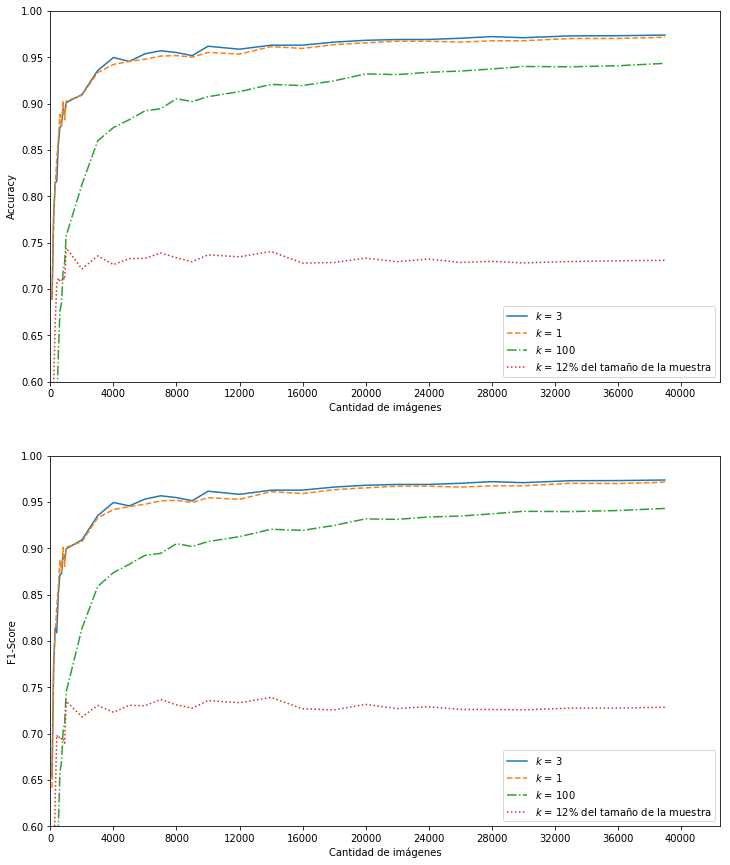

In [41]:
def plot_scores(acc, f1, x, fig, ax, l):
    for i in [0,1]:
        ax[i].set_xlabel("Cantidad de imágenes")
        ax[i].grid()
        ax[i].set_ylim(0.6, 1)
        ax[i].set_xlim(0, 42500)
        ax[i].set_xticks(range(0, 42000, 4000));
    # Grafico de accuracy
    ax[0].plot(x, acc, l)
    ax[0].set_ylabel("Accuracy")

    # Grafico de F1
    ax[1].plot(x, f1, l)
    ax[1].set_ylabel("F1-Score")

from itertools import chain, cycle
lines = ["-", "--", "-.", ":", ":."]
linecycler = cycle(lines)
fig, ax = plt.subplots(2, 1, figsize=(12,15))
# Graficar scores

plot_scores(acc_3, f1_3, k_3, fig, ax, next(linecycler))
plot_scores(acc_1, f1_1, k_1, fig, ax, next(linecycler))
plot_scores(acc_100, f1_100, k_100, fig, ax, next(linecycler))
plot_scores(acc_v, f1_v, k_v, fig, ax, next(linecycler))
ax[0].legend(['$k$ = {}'.format(a) for a in [3,1,100,'12% del tamaño de la muestra']])
ax[1].legend(['$k$ = {}'.format(a) for a in [3,1,100,'12% del tamaño de la muestra']])


In [44]:
def set_X_y_with_train_size(train_size, test_size=10, seed=0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=test_size, random_state=seed)
    for train_index, _ in sss.split(X, y):
        X_train = X[train_index]
        y_train = y[train_index]
        return X_train, y_train

In [43]:
def variate_kFOLD(n):
    results = []
    fname = "exp4_variate_KFold_k3_alpha37_K{}".format(n)
    X_train, y_train = set_X_y_with_train_size(n)
    results.append(run_knn_with_k_alpha_kfold(3, 37, X_train, y_train, n-20))
    save_array(fname, results)
    print("Done with: {}".format(n))


In [45]:
def run_knn_with_k_alpha_kfold(k, alpha, X_train, y_train, cv, seed=0, n_iters=3):
    scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
    results = {'acc': [], 'f1': [], 'times': []}
    clf = KnnClassifier(k=k, alpha=alpha)
    res = cross_validate(clf, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    results['acc'].append(np.mean(res['test_acc']))
    results['f1'].append(np.mean(res['test_f1']))
    results['times'].append(np.mean(res['score_time']))
    return results

In [18]:
variate_kFOLD(5000)

ValueError: n_splits=4980 cannot be greater than the number of members in each class.

In [50]:
 # Runs a single time knn with data in X_train and y_train.
def run_knn_with_k_alpha_kfold(k, alpha, X_train, y_train, cv_k, seed=0):
    scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
    results = {'acc': [], 'f1': [], 'times': []}
    clf = KnnClassifier(k=k, alpha=alpha)
    res = cross_validate(clf, X_train, y_train, cv=cv_k, scoring=scoring, return_train_score=False, n_jobs=-1)
    results['acc'].append(np.mean(res['test_acc']))
    results['f1'].append(np.mean(res['test_f1']))
    results['times'].append(np.mean(res['score_time']))
    return results

def variate_kFOLD():
    results = []
    fname = "exp4_variate_KFold_k3_alpha37_cv_200"
    X_train, y_train = set_X_y_with_train_size(5000)
    # rango = list(range(10, 5000, 500))
    # rango.append(5000)
    results.append(run_knn_with_k_alpha_kfold(3, 37, X_train, y_train, 200))
    save_array(fname, results)


variate_kFOLD()

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp9te6zc9k... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333229 245580 216571 182718 168951 148894 115593 97032.7 94830.5 82737.2 73549.2 70054.2 59512.9 57960.5 54058.9 51366.6 45461.3 43796.5 41437.2 39326.7 38209.2 34998.9 32481.2 31408.6 30486.2 28542.9 27030.3 26201.6 25638.3 24006.7 22629.3 22276 20579.7 20328.1 19735.7 18643.6 17526 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpjoa6jzi4... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 332999 245785 215930 182712 169314 149323 115785 97100.2 94816.6 82468.4 73387.5 70373.8 59551.1 57925.9 54157.1 51253.7 45470.9 43932 41415.7 39182.9 38187.3 35047.4 32616.1 31385.6 30495.5 28568.2 26918.4 26160.8 25494.7 23887.8 22709.8 22294.6 20593.8 20290.5 19725 18609.5 17570.7 
Transformando


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpqq4frbat... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333987 245600 216031 182367 168792 149117 115773 96994.2 94703.4 82754.6 73335.7 70162.8 59532.6 58063.9 54133 51275.3 45469.2 43850.8 41447 39122 38137.5 35084.4 32582 31389.1 30522 28477.6 27076.6 26219.8 25516.6 23947.2 22735.2 22244.9 20545.6 20313.5 19722.3 18593.3 17576.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmplkwvru4f... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333625 245320 216155 182863 169031 149215 115704 96825.1 94835.1 82697.1 73310.2 70416.6 59505.1 58011.7 54165.5 51239.9 45405.2 43742.2 41328.5 39321.2 38312.9 35035.8 32619.3 31350.2 30431.3 28570.1 27034.3 26150.2 25617.9 23940 22668.3 22267.2 20620.6 20266.4 19714.8 18522.2 17568.9 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp1wfwrocn... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333619 246203 216088 182864 169238 148775 115653 97124.7 94614 82623.4 73454.5 70284.7 59574.6 57910.1 54040.1 51243.6 45490.1 43954.2 41348.8 39230.6 38189.5 34927.1 32616.6 31304.2 30527.8 28526.9 27060.1 26125 25520.9 23957.2 22711.4 22239.8 20567.5 20265.4 19652 18640.9 17600.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpcglzgyzv... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 332860 245791 216238 182952 169184 149049 115493 96983.8 94867.7 82623.4 73416.7 70273.5 59532.3 58085.5 54084.3 51334.7 45458.4 43907.8 41327.9 39254.4 38255.5 35018.1 32669.3 31384.9 30463.9 28456.1 27025.2 26135.5 25563.6 23895 22633.9 22271.9 20585.8 20327.6 19652.7 18606.4 17602.5 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpdv2nd453... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 334020 245316 215680 183226 169070 149405 115717 96999.7 94729.3 82639.9 73455.7 70123.7 59408.6 58065.9 54050 51365.1 45358.9 43934.3 41364.4 39214.2 38253.8 35054.3 32683.8 31297.1 30450.6 28507.6 27021.7 26045.6 25606.4 24004 22655.3 22244.9 20547.9 20322.2 19698.6 18589.9 17498.8 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpy8n97qlu... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333452 245567 216048 183130 169084 149085 115517 96979.9 94882.7 82614.5 73355.1 70240.1 59522.9 58122.8 54031.6 51214.8 45524.3 43971.7 41398.9 39310.6 38285.3 35026.3 32698.7 31322 30510.7 28557.9 27110.4 26219.1 25568.4 23963.5 22618.2 22238.3 20585.7 20309.1 19720 18605.2 17562.5 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpv_hjihcf... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333563 245822 216210 182788 168823 149380 115161 97083.5 94695.2 82497.6 73396.3 70337.5 59659 58138.9 53970.9 51319.8 45626.5 43870.2 41412 39232.3 38142.8 34928 32663.3 31253.5 30456.5 28516.4 27056.1 26207.7 25497.9 23895.5 22703.4 22307.2 20598.4 20246.4 19704.7 18630.1 17573.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpk8hdju8c... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 334186 245404 215827 182906 169010 149382 115771 96887.9 94942.4 82705.7 73497.1 70341.2 59596.9 58009.9 54091.6 51171.7 45430 43974.1 41396.5 39290.8 38275.6 34972.8 32660.5 31353.4 30375.8 28501.3 27079.4 26173.3 25527.8 23994.5 22577.3 22270.3 20563.9 20288.6 19738.3 18543.4 17616 
Transformando 


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpnj0cw2do... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333899 245221 215934 183303 169079 148909 115688 97098.2 94786.1 82627.1 73396.8 70172.1 59440.2 58057.2 54003.8 51271.4 45511.6 43935.8 41413.8 39343.2 38109.4 35042.2 32626.8 31329.2 30433.8 28500 27061.1 26109.2 25652.9 23837.5 22645.5 22248.1 20631.9 20177.6 19647 18587.4 17543.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpjezawpse... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 333794 245497 216231 182655 168859 149227 115587 97121.2 94557.9 82746.2 73455 70307.7 59537.3 58046.7 53887.5 51268.8 45508.4 43904.3 41281.7 39351.3 38261.9 35041.7 32668.1 31420.2 30438.9 28557.9 27084.1 26229.5 25506.7 23955.5 22631 22259.6 20621.9 20328.6 19739.4 18598.4 17525.4 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp1a2oqo56... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 334185 245532 216098 182541 169248 149295 115621 96964 94963.8 82603 73552.4 70265.4 59483.8 57799.7 54065.4 51424.1 45480.7 43965.3 41351.4 39274.3 38193.1 34885.1 32645.9 31336.2 30474.8 28441.5 27003.5 26198.9 25599 23961.4 22670.2 22300.2 20627 20354.4 19765.5 18560.6 17606.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpjay9zidi... listo.
Tamaño dataset: 4970
Corriendo PCA... listo.
Autovalores: 334144 245304 215704 182830 169041 149121 115724 96796.6 94592.4 82522.5 73428.5 69866.9 59540.5 57963.4 53973.5 51294.6 45556.3 43870.7 41481.5 39289.8 38299.2 34831 32596.7 31313.9 30501.8 28511.2 27065 26213.6 25471.7 23887.8 22642.3 22241.4 20568 20258.1 19739.7 18551.5 17572.6 
Transformando data


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpc892yy1f... listo.
Tamaño dataset: 4971
Corriendo PCA... listo.
Autovalores: 333572 245199 216209 182932 168883 149010 115563 97163.8 94904.2 82746.3 73520.7 70055.3 58011.9 59590.2 54151.5 51331.6 45517.3 43832.1 41387.3 39326.4 38296.8 34972.2 32640 31298.3 30527 28482.5 27040.5 26214.2 25513.8 23938.8 22669.4 22293.1 20584.6 20308.2 19732.6 18639.9 17521.5 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpmxbo6uiz... listo.
Tamaño dataset: 4971
Corriendo PCA... listo.
Autovalores: 333679 245938 216293 182621 168825 149008 115591 97220.1 94850.3 82570.7 73403.3 70386.5 59467.3 58004.4 54013 51247.2 45472 43936.6 41401.3 39272 38179.9 34863.4 32594.9 31365.1 30415.9 28569.6 27084.8 26196 25563.7 23973.7 22691.3 22286.1 20620 20359.9 19756.3 18571 17581.2 
Transformando datase


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp_xu2adbn... listo.
Tamaño dataset: 4971
Corriendo PCA... listo.
Autovalores: 333483 245216 216428 182306 169207 149154 115725 97075.6 94706.3 82799.5 73439.1 70240 59578 58056.6 54024.9 51165.5 45601.3 43748.5 41337.1 39266.8 38251 34966.7 32604.5 31295.7 30413.3 28464 27058.1 26195.5 25589.6 23937.5 22600.4 22291.8 20569.5 20244.1 19706.9 18615.2 17578.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp_l09oc20... listo.
Tamaño dataset: 4971
Corriendo PCA... listo.
Autovalores: 334196 245196 216274 182391 169178 149346 115774 96905.5 94585 82690 73562 70315.6 59583.8 57999.7 53949.1 51193.2 45500.5 43947.6 41347.9 39224.5 38211.4 34932.6 32625.2 31311 30434.1 28513.9 27015.6 26183.5 25571.5 23927.8 22682 22267 20559.2 20283.4 19750.7 18598.2 17511.9 
Transformando dataset...


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp3u8_2t56... listo.
Tamaño dataset: 4971
Corriendo PCA... listo.
Autovalores: 333878 245538 216205 182753 168974 149095 115507 96728.8 94835.4 82574.5 73548.2 70311.6 59641.2 58053.6 53835.3 51373.1 45463.3 43790.8 41501.1 39188.4 38226.4 35048.9 32522.5 31379.1 30552.8 28470.2 27023.1 26227 25520 24000 22660 22285 20611.9 20273.6 19756.9 18612.1 17586.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmph8mj4j9t... listo.
Tamaño dataset: 4971
Corriendo PCA... listo.
Autovalores: 333999 245474 216324 182995 168626 149141 115955 96940.4 94838.9 82638.6 73393.5 70458 59476.5 57955.7 54028 51349.2 45528.3 43886.1 41305.4 39302.1 38298 35057.1 32621.9 31370.5 30523.2 28583.2 27022.7 26200.2 25614.3 23956.4 22671.1 22256.9 20592.1 20313.5 19724.7 18558.8 17557 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp787ybd0z... listo.
Tamaño dataset: 4973
Corriendo PCA... listo.
Autovalores: 333283 245924 216002 183059 168632 149051 115857 96837.1 94882 82457.8 73388.3 70343.5 59516 58059.8 53844.2 51296.7 45506.2 43826.8 41411.5 39275.6 38229.5 34971.3 32671.5 31344.6 30484.6 28567.6 27028.5 26141.5 25542.7 24013.7 22677.2 22236.2 20553 20296.9 19679.3 18628.1 17537.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp5hcpv6pu... listo.
Tamaño dataset: 4973
Corriendo PCA... listo.
Autovalores: 333711 246063 216011 182580 169234 148806 115759 96820.7 94772.1 82702.1 73515.2 70101.3 59579.8 57928.8 54054.8 51282.7 45555.3 43873.8 41255.8 39264.5 38288.9 34939.6 32656.6 31352.4 30471.7 28566.6 27034.5 26147.4 25575.2 24005.2 22698.3 22254.8 20613.9 20301.2 19731.5 18597.1 17596 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpr6nzso_l... listo.
Tamaño dataset: 4975
Corriendo PCA... listo.
Autovalores: 332958 245728 216031 183199 169065 148907 115765 96948.8 94586.3 82709 73403.5 70325.3 59489.3 57981 53955.4 51108.1 45542 43878.8 41393.8 39295.6 38201.2 35005.8 32697.8 31417.6 30553.2 28572.4 27073.6 26159.9 25579.2 24032.6 22695.6 22296 20577.9 20281 19733.8 18580.6 17560.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmphggv2c5y... listo.
Tamaño dataset: 4975
Corriendo PCA... listo.
Autovalores: 334520 245708 215979 182930 169239 148795 115630 96998.7 94681.7 82808.7 73420 70190.2 59530.9 58045.5 54066.5 51393.1 45495.6 43920.1 41401.1 39323.6 38262.6 34989.9 32642 31401.5 30538 28563.5 27016.6 26242.7 25541.9 24004.1 22674.3 22273.6 20555.5 20237.5 19711.9 18612.4 17572 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpiv8cn3jp... listo.
Tamaño dataset: 4977
Corriendo PCA... listo.
Autovalores: 334036 244865 216156 182978 169058 149253 115680 96788.9 95032.7 82729.8 73412.6 70165.8 59518.9 57959.1 54082.7 51277.6 45475.5 43846.3 41417 39289.8 38274.1 35032.2 32674 31351.6 30457.3 28484.3 27039.9 26168.2 25532.9 24012.7 22692.5 22301.9 20559.4 20309.5 19757.7 18572.1 17555 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpg2qj52v4... listo.
Tamaño dataset: 4977
Corriendo PCA... listo.
Autovalores: 333882 245259 216321 183132 168989 149108 115834 97051.1 94736.6 82687.2 73388.3 70256.1 59416.7 58082.1 54057.9 51290.2 45494.6 43924.6 41411.7 39296.1 38238.2 35008.7 32644.3 31368.6 30410 28470.7 26963.3 26067.9 25569.4 23988.7 22638.1 22332.6 20551.7 20326.9 19728.4 18597.6 17610.9 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpx7ra7uk4... listo.
Tamaño dataset: 4977
Corriendo PCA... listo.
Autovalores: 333564 245457 215952 183413 168846 149055 115703 97070 94643.9 82454.5 73472.7 70259.3 59512.9 58061.2 54017.1 51401.7 45505.9 43893.2 41274.8 39224.5 38118 35049.1 32694.5 31406.6 30546.4 28557.2 27020.5 26105 25619.3 24001.3 22603.5 22300.1 20567.9 20279.3 19736.9 18643.1 17598.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp6tqhh1zr... listo.
Tamaño dataset: 4977
Corriendo PCA... listo.
Autovalores: 333522 245473 216132 182679 169254 149183 115523 96921.5 94598.4 82533.3 73375.9 70291.1 59460.1 58008.4 54074.4 51135 45580 43796.9 41284.2 39327.1 38293.6 35039.1 32620.9 31347.8 30540.3 28453.4 27025.5 26134.7 25546.3 23962.8 22688.8 22261.3 20570 20318.4 19749.3 18547.1 17526.9 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpdow6tulm... listo.
Tamaño dataset: 4978
Corriendo PCA... listo.
Autovalores: 334215 245251 216208 183241 169423 149148 115884 96981.5 94842 82547 73358.7 70320.7 59484.8 58089.2 54075.7 51282.2 45529.2 43998.7 41424.8 39309.3 38234.3 35049.1 32654.2 31369.8 30507.2 28547.7 27030.9 26184.2 25603.2 24008.1 22677.4 22318.4 20574.5 20311.8 19698.6 18600.5 17576.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpq0pnktqh... listo.
Tamaño dataset: 4978
Corriendo PCA... listo.
Autovalores: 334077 245557 216222 182933 169059 148771 115579 97019.5 94725.2 82560.6 73406.1 70244 59614.5 57955.7 54115.5 51177.7 45506.5 43996 41311.3 39317.6 38039.7 35060.6 32597.6 31329.6 30478.3 28557.2 27048.7 26102.3 25567.3 23982.3 22674.7 22263.9 20574.3 20254.7 19733.9 18598.7 17555.7 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpe4lg56vj... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333140 245787 215945 182592 169377 149188 115511 97012.1 94514.2 82578.6 73369.3 70343.2 59470.3 58023.7 54051.6 51195.2 45526.7 43846.8 41382.7 39276.5 38179.6 34983.5 32637.5 31365 30553 28543.6 27053.3 26179.3 25565.1 23989.4 22697.9 22275.1 20583 20242.1 19720.9 18616 17585.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpf8a_hq70... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333449 245889 216041 182439 168910 149349 115694 97019 94686.9 82570.2 73593.5 70266 59460.8 57979.3 54067.1 51335.5 45462.4 43908.9 41438.4 39275.9 38078.3 34900.8 32626.9 31370.7 30480.6 28554.5 27073.3 26160.2 25588.5 23943.2 22683.3 22237.4 20545.4 20324.2 19713.9 18602.9 17575.8 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmppvfgbza9... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333629 245653 216266 182557 169111 149249 115578 96810.1 94773 82707.4 73416.3 70420.6 59558.9 58039 54043.1 51242.8 45517.8 43861.1 41428.6 39327.1 38258.2 35020.5 32650.5 31376.7 30549.9 28549.6 27005.1 26147.1 25603.9 23940.6 22634.2 22296.5 20567.4 20297.4 19748.9 18592.5 17601 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpahvpil3o... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333955 246011 216280 183172 169000 149085 115583 94827.6 97029.2 82520.6 73586.5 70274.6 59511.7 57880.9 54134.6 51432 45526.4 43907.1 41435.9 39234.5 38187.2 35075.9 32701 31410.2 30524.3 28523.6 27050.8 26134.5 25567.4 24031.9 22666.9 22213.8 20565.3 20299.6 19715.6 18606.2 17601 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpttb8aigy... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333526 245559 215995 182709 168920 149234 115548 96989.3 94766.6 82751.4 73430.4 70386.9 59478.9 58063.1 54023.6 51291.9 45504.8 43927.9 41394.9 39304.4 38190.3 35033.3 32638.2 31395.6 30490.3 28533.1 27069.3 26226.7 25614.6 23928.3 22643.6 22280.5 20587.8 20300.5 19706.2 18607.5 17598.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmphhpimcgx... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333513 245550 216194 182801 169081 149402 115631 97116.8 94858.3 82480.8 73359.1 70270.2 59364.8 58081 54078 51385.1 45464.6 43907.5 41341.5 39274.6 38198.7 34913 32664.9 31321.5 30485 28522 27055.1 26144.5 25610.4 23918.3 22693.1 22247.9 20559.1 20267.1 19683.9 18615.1 17577.3 
Transformando 


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpe8l6_u81... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333830 246122 216528 182611 169106 149093 115664 96835.7 94844.2 82381.9 73512.9 70227.1 59305.1 58067.8 54077.6 51289.5 45464.9 43863.3 41361.4 39350.3 38220 35056.6 32646.2 31335.5 30507.3 28489.6 27021 26185.1 25572.6 23975.9 22641.6 22242.6 20555.8 20342.2 19717.4 18583.1 17600.8 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpv8sgbxlz... listo.
Tamaño dataset: 4979
Corriendo PCA... listo.
Autovalores: 333162 245443 215969 183168 168758 149260 115736 96920.7 94876.3 82630.3 73463.9 70174 59527 58048.7 54023.5 51356.6 45506.5 43954.4 41434.7 39224.2 38205.5 34999.6 32657 31297.9 30533.2 28507.2 27106.7 26194.6 25590 23960.5 22624 22211.1 20580.1 20278.7 19704 18584.7 17539.6 
Transformando datase


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpmjcsygzj... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333423 245626 216234 182872 169011 149033 115833 96833.6 95093.4 82488.9 73449 70400.1 59444.9 58011.1 54007 51372.2 45544.9 43932.6 41395.2 39318.1 38162.1 35003.9 32669.1 31348.1 30456.4 28491 27090.6 26132.9 25597.1 23965.3 22652.9 22301.7 20604.8 20253.5 19755.6 18550.9 17563.8 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpwd3fs2t0... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333164 245221 215687 183041 169126 149340 115759 96852.2 94894.1 82614.8 73352 70330 59489.5 58096.3 54057.3 51201.2 45498.9 43909.6 41415.6 39309.9 38232.6 34963.5 32637.5 31292.8 30463.6 28526.1 27033.1 26117.4 25581.6 23999.9 22704.3 22225.5 20617.2 20318.1 19745.5 18631.4 17602.4 
Transformando 


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpegwo7viy... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333643 245506 216357 182501 169183 149077 115821 96774.2 94886.4 82647 73414 70298.4 59504.7 57989.1 54108.4 51242.3 45599.4 43837.1 41274.4 39262.9 38236.1 35023.8 32551.1 31388.9 30498.9 28548.5 27048.9 26194.7 25545.3 24022.4 22706 22274 20591 20265.2 19716.2 18614.9 17590.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpurgtp24g... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 334027 245554 216496 182663 168886 149062 115790 96757.3 94958.5 82707.3 73462.8 70347.3 59551.1 58117 54122.9 51287.5 45539.7 43961.7 41410.6 39287.6 38204.5 35073.4 32674.2 31380.3 30528.8 28554.1 27021.9 26166.2 25576.3 23975.3 22678.2 22300.2 20587.2 20274.4 19743.2 18625.1 17556.3 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmprj_6ht7l... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333894 245205 216494 182953 169199 149283 115583 96982.9 94933.2 82591.3 73431 70348.9 59660.8 57974.2 53869.1 51407.1 45544.5 43889.4 41338 39283.6 38247.9 35041.5 32719.3 31363.2 30498.2 28580.4 27049.4 26196.6 25548.6 23955.5 22266.3 22633.3 20571.3 20289.3 19707.4 18570.6 17578.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmppsm067xp... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333837 245645 216395 182953 168920 148841 115334 96893.6 94628.5 82674.9 73406.5 70230.5 59630.4 58071.1 54048.2 51325.7 45494.6 43794.1 41375.6 39247.5 38287.1 35014.3 32620.2 31280.3 30450.7 28577.9 27064.4 26147.2 25643.9 23996.9 22602.7 22294.9 20533.6 20297.8 19738.4 18635.8 17606 
Transforma


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp_b8lxneu... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333843 245211 216305 182832 169016 148829 115577 97044.9 94874.4 82674.7 73465.1 70368.3 59510.8 58062.3 54108 51182.4 45510.4 43955.2 41380.9 39207.6 38222.7 35062.9 32642.6 31379.1 30474 28501.7 27062.3 26190.6 25560.6 24003.5 22690.2 22303.7 20594.7 20293.9 19698.7 18533.2 17536.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp9_3tl6i5... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333877 245518 216194 182462 169163 149197 115529 96920.6 94929.2 82618.1 73288.9 70314.6 59628.9 58020.8 54030.7 51304.6 45569.2 43810.3 41368.1 39270 38193.3 35026.4 32626.7 31374.4 30474.9 28527.5 27018.4 26165.8 25528.6 23939.8 22617.8 22293.7 20579.5 20304 19742.1 18584.9 17550.2 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpf0t31vcx... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333940 245254 215782 182474 168888 149208 115395 94561.7 96830.4 82692.8 73355.1 70267.8 59470 58011.7 54041.2 51216.4 45458.9 43842.9 41361.9 39225.3 38160.8 35028.2 32607 31253.7 30441.1 28537.5 27032.5 26117 25566.8 23952.1 22679.4 22258.2 20555.1 20258.2 19709.2 18580.4 17588.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpa6m_oqls... listo.
Tamaño dataset: 4980
Corriendo PCA... listo.
Autovalores: 333477 245922 215766 183042 168771 149012 115768 97048 94684.6 82646.1 73295.6 70278.7 59512.6 58056.5 53979.7 51340.8 45624.2 43898.9 41448.2 39278.9 38201.2 35018.9 32670.9 31404.6 30469.4 28546 27079.6 26156.5 25585.4 23988.7 22696.3 22233.1 20581.4 20323.4 19734 18589.7 17581.5 
Transformando da

In [49]:
def variate_kFOLD_100():
    results = []
    fname = "exp4_variate_KFold_k3_alpha37_cv_100"
    X_train, y_train = set_X_y_with_train_size(5000)
    # rango = list(range(10, 5000, 500))
    # rango.append(5000)
    results.append(run_knn_with_k_alpha_kfold(3, 37, X_train, y_train, 100))
    save_array(fname, results)


variate_kFOLD_100()

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpv3tlegg9... listo.
Tamaño dataset: 4947
Corriendo PCA... listo.
Autovalores: 333439 245732 216459 182993 169303 149056 115479 97064 94817.5 82715.5 73539.8 70115.8 59485 57967.4 54142.8 51318.3 45500 43759.5 41445.1 39278 38154.2 34995.4 32421.6 31454 30485.3 28507.5 27017.3 26175.2 25583.8 23938.5 22684.9 22291.2 20617.2 20351.2 19733.7 18667 17493.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp5_r1fc06... listo.
Tamaño dataset: 4947
Corriendo PCA... listo.
Autovalores: 333098 245719 216187 182456 169004 149047 115676 96993.7 94767.6 82543.9 73385.5 70286.2 59604.9 57957.3 54143.1 51164.6 45536.7 43861.7 41356.1 39170.3 38251.7 34939.7 32677 31303.5 30461.7 28551.6 27070.4 26260 25604.7 23961.5 22643.3 22325.8 20588 20289.1 19691.1 18645.7 17571.2 
Transformando dataset..


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp85_ji61w... listo.
Tamaño dataset: 4947
Corriendo PCA... listo.
Autovalores: 333627 245939 215614 182943 168902 149058 115684 94928.2 96927.9 82592.4 73393 70337 59587.9 58175.5 54065.8 51359.8 45445.5 43929.4 41315.1 39281 38307.5 35008.4 32655.8 31318.3 30561.2 28522.6 27133.5 25975.6 25577.3 24045.1 22733.7 22214.6 20643.8 20258.1 19708.6 18641.5 17598.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpab01zwvs... listo.
Tamaño dataset: 4947
Corriendo PCA... listo.
Autovalores: 333987 245992 216422 182703 168956 148709 115463 96858.3 94846.1 82626.2 73254.4 70366.6 59601.2 58039.5 53983.3 51290.8 45363.9 43847.8 41419.3 39276.3 38257.9 35050.1 32645.8 31375.3 30486.3 28603.3 27068.6 26090.8 25674.6 23917.3 22659.3 22259.1 20558.7 20342.7 19647.1 18626.7 17583.6 
Transforma


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpgmhh5ygw... listo.
Tamaño dataset: 4948
Corriendo PCA... listo.
Autovalores: 333944 245943 215730 183313 169142 148806 115756 96971.4 94745.1 82495.4 73510.6 70028.5 59632.8 57828.9 54020.6 51292.7 45599.7 43760.1 41454.6 39173 38222.8 34975.8 32548.8 31290.1 30507.3 28484.2 27052.2 26175.2 25575.8 23942.2 22687.2 22329.8 20607 20215.9 19729 18588 17555.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpe2wtyihx... listo.
Tamaño dataset: 4948
Corriendo PCA... listo.
Autovalores: 333869 245601 216180 183220 168629 149290 115085 97072.7 94796.5 82521.5 73471.3 70351.6 59613.7 58192.2 53949.9 51322.1 45680 43820.9 41403.5 39306.7 38203 35014.6 32680.9 31330.2 30446.9 28464.5 27154.8 26136.4 25555.6 23916.4 22655.1 22311.4 20587.5 20255.3 19704.7 18624 17608.6 
Transformando data


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp4wjev_xz... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 332787 246012 215764 183104 168683 149211 115664 97158.8 94952.1 82451.4 73423.5 70053.6 59813.6 58138.7 54108.3 51303 45550.7 43774.6 41417.1 39276.2 38158.5 35041 32693.3 31438.9 30567.3 28584.1 27042.6 26257 25520.4 23943.1 22667.6 22342.2 20584.4 20355.2 19776.2 18583 17572.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp0eqx5k31... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 333485 245409 215846 183092 168927 149392 115534 96876.5 94920 82459.8 73026.1 70183.6 59144.2 58147.4 54182.4 51324.4 45557.2 44011 41480.3 39284.7 38212 34997.7 32684.6 31252.3 30451.8 28520.6 27015.8 26176.8 25517.6 23886.8 22553.1 22162.8 20630.9 20229.7 19743.7 18592.6 17575.6 
Transformando data


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp3f0u3nxn... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 333204 246026 216278 183025 169143 149281 115083 97348.6 94928.3 82702.6 73472.7 70404.5 59422.3 58002 53910.6 51352.9 45561.6 43815.6 41395.2 39406.7 38164.1 35087.8 32622.5 31232.6 30537.5 28574.4 26996.3 26107.7 25655.9 23879.2 22647.9 22310.8 20558.7 20334.8 19754.1 18623.3 17570.6 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpnssgg1z5... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 334065 245809 215946 182645 168601 148981 115521 97013.4 94920.1 82628.4 73540.8 70337.2 59457.2 58159.7 54064.1 51185.5 45469.2 43890.9 41264.4 39170.8 38139.1 35090.3 32667.2 31373.6 30401.3 28470.6 27057.4 26192.7 25653 23998.8 22714.4 22269.8 20500.1 20246.1 19741.4 18608.5 17547.3 
Transfor


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpkpuks9s3... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 334101 245272 216782 182328 169410 149464 115860 96867.7 94617.7 82496.2 73470.9 70325.9 59610.5 57932.5 53929 51129.6 45464 43805.6 41313.6 39214.1 38256.5 34879.2 32606.7 31302.8 30400.5 28543.9 26956.4 26137.9 25590.2 23947.3 22645.3 22259.2 20567.7 20217.2 19742.1 18573.2 17524 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpkzi98io_... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 332923 245685 216300 182956 169064 148991 115937 96557.5 94950.4 82748.9 73479.7 70346.2 59499.3 57809.9 53945.3 51352 45279.8 43911.6 41351.7 39404.1 38206.5 34934.6 32667.2 31281.3 30442.8 28506.5 27048 26196.7 25613.6 23952.6 22671.3 22365.7 20629.7 20302.6 19762.5 18596 17602.2 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmppbt45xcw... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 333083 246002 216182 182983 168776 149039 115922 97140.2 94863.3 82695.1 73348.2 70168.5 59557 58013.9 53974 51293.7 45554.9 43958.9 41323.2 39342.5 38277 34942 32573.4 31366.2 30444.9 28535.3 26986.9 26231.1 25565.8 24067.4 22696.8 22264.1 20593.5 20316.3 19717.8 18645.2 17588.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpxnc2k38f... listo.
Tamaño dataset: 4949
Corriendo PCA... listo.
Autovalores: 334061 245088 216038 182269 169222 149019 115432 96918.3 95081.1 82683.5 73471.3 70288.1 59320.9 58059.7 54030.6 51437.2 45515.8 43967.9 41374.2 39225.7 38301.7 34861 32609.5 31451.8 30473.7 28396.4 27051.3 26248.4 25666.1 24003.1 22637 22260.1 20496.3 20368.4 19721.1 18630.9 17618.9 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpaaogomwk... listo.
Tamaño dataset: 4951
Corriendo PCA... listo.
Autovalores: 332907 244566 216558 183151 168820 149008 115473 96544.7 94770.6 82630 73350.4 70139 59409.4 57974.5 54023.4 51330.5 45479.4 43846.1 41306.8 39313.2 38151.6 34947.1 32625.5 31348.8 30516.9 28494.1 26964.1 26116.8 25559.4 23959.1 22643 22297.1 20623.1 20288.5 19721.2 18577.8 17557.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpvv3cyx0o... listo.
Tamaño dataset: 4951
Corriendo PCA... listo.
Autovalores: 333667 245599 216171 183390 169262 149061 115628 97110.3 94619.5 82779.8 73361.4 70375.2 59477.1 57928.8 53938.8 51259.7 45427.4 43899.1 41198.5 39318.1 38282 35112.8 32764.1 31353.9 30460.8 28563.3 27038.5 26128.5 25537.8 23978.9 22673.5 22217.9 20653.7 20281.8 19734 18583.1 17581.6 
Transformando 


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpjzviyxnn... listo.
Tamaño dataset: 4951
Corriendo PCA... listo.
Autovalores: 334258 245191 216258 183347 169002 149063 115766 96547.9 94633.8 82343 73471.7 70371.6 59517.5 58002.1 53994.7 51117.9 45585.6 43848.8 41319.7 39309.6 38218.7 35078.2 32616.9 31383.4 30546.8 28563.3 27071.5 26277.7 25628.3 23962 22709.1 22262.1 20587 20356.7 19714.9 18645 17596.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpudr5tn3f... listo.
Tamaño dataset: 4951
Corriendo PCA... listo.
Autovalores: 332620 246631 216373 182524 168857 149280 115792 96837.6 94791 82523.6 73553.3 70192.6 59458 57959 54097.9 51223 45549.8 43843.1 41521.5 39143.9 38204.2 34934.9 32627.8 31454.8 30625.5 28586.5 27000.3 26113.6 25601.4 23975.1 22745.8 22172.6 20545 20285.4 19734.3 18603.8 17580.9 
Transformando dataset.


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpsvde6068... listo.
Tamaño dataset: 4951
Corriendo PCA... listo.
Autovalores: 333621 245641 216427 182822 168986 149378 115501 96891.1 95039.6 81882.3 73508.3 70414.3 59479.1 58101.5 54024.1 51334.9 45534.8 44011.8 41402.7 39377.8 38213.1 34867.7 32622.1 31375.3 30592.4 28619.2 26984.4 26084.8 25506.1 23944.4 22653.3 22247.7 20685.8 20320.5 19786.6 18576.3 17613.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpt_c90i2_... listo.
Tamaño dataset: 4951
Corriendo PCA... listo.
Autovalores: 333501 245499 216576 182997 169120 149443 115864 96688.2 94776.1 82635.7 73625.8 70336.5 59457.3 57783.9 53809.6 51346.8 45555.6 43870.3 41433.5 39231.9 38225.7 34912.8 32611 31257.6 30491.8 28522.2 27036 26209.5 25523 23939.9 22655.6 22239.9 20626.1 20304.5 19654 18572.3 17546.6 
Transformand


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpmitmuzgy... listo.
Tamaño dataset: 4953
Corriendo PCA... listo.
Autovalores: 334148 245409 216048 182804 169060 149178 115670 96909.3 94612.8 82652.5 73446.1 70330.8 59690 57902.3 54204.1 51155.7 45461.5 43753.6 41153.3 39288.6 38233.7 35050.9 32663.2 31398.2 30491.7 28491.9 27056.4 26127.1 25543.9 24035.4 22682.2 22241.5 20546 20200.5 19756.8 18602.3 17520.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpybnkcjm1... listo.
Tamaño dataset: 4953
Corriendo PCA... listo.
Autovalores: 334090 245350 215505 182997 169165 148822 115762 96885.5 95059 82575 73388 70404.3 59594 58088.3 54122.5 51292.2 45534.2 43818.2 41341.5 39218.6 38278.1 34960.4 32672.3 31486.4 30539.1 28460.2 27072.7 26120.4 25513.8 24001.8 22683.7 22217.9 20669.9 20335.3 19677.1 18593.6 17564.9 
Transformando da


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp3vte7r5l... listo.
Tamaño dataset: 4955
Corriendo PCA... listo.
Autovalores: 333606 245559 216204 182920 169192 148839 115329 96964.3 94974.3 82674.8 73361.1 70071.1 59646.4 58062.9 53976.4 51344.3 45459.1 44002.1 41318.4 39291 38242.8 34960.7 32708.2 31246.2 30413.6 28447.7 27086 26204.1 25501.8 23993 22664.6 22278.2 20623.8 20249.2 19623.3 18610.7 17530.4 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpgx9u72no... listo.
Tamaño dataset: 4955
Corriendo PCA... listo.
Autovalores: 333120 245216 216662 182964 169121 148974 115697 96961.1 94438.4 82724.6 73518.7 70335 59534.4 57940 53830.2 51292.8 45549.1 43851.6 41393.6 39273.3 38180.4 35047.1 32472.8 31339.3 30505.6 28586.6 27021.2 26201.6 25511.9 23977.3 22575.5 22260.4 20612.9 20272 19726.5 18631.1 17563.9 
Transformando da

In [48]:
def variate_kFOLD_5():
    results = []
    fname = "exp4_variate_KFold_k3_alpha37_cv_5"
    X_train, y_train = set_X_y_with_train_size(5000)
    # rango = list(range(10, 5000, 500))
    # rango.append(5000)
    results.append(run_knn_with_k_alpha_kfold(3, 37, X_train, y_train, 5))
    save_array(fname, results)


variate_kFOLD_5()

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmprwbmbw_9... listo.
Tamaño dataset: 4002
Corriendo PCA... listo.
Autovalores: 334313 245027 218675 184702 171478 150176 116942 96038.3 93419.7 82238.1 74153.6 70149.1 59741.5 57923.9 53817.9 51086.1 46084.8 44156.2 41511.2 39510.7 37625.7 35123.1 33050.6 31726.6 31239.9 28664.9 27334.2 26018.2 25518.2 23996.8 22770.4 22190.1 20890.2 20218.3 19899.3 18847.2 17727.2 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpmpn_8e2s... listo.
Tamaño dataset: 3996
Corriendo PCA... listo.
Autovalores: 333858 244841 214584 184583 165434 148616 115068 98102.6 94857.9 82958.4 73848.9 69280.7 59724.1 58174.4 54539.6 51708 45479.8 44292.2 41533.8 39743.9 37907.7 34492.3 32353.6 31098.2 30298.8 28498.3 27382.2 26174.7 25627.9 23612.2 22815.2 22409.6 20956.2 20557.7 20237.2 18483.1 17784.6 
Transfo

In [52]:
def load_results(fname):
    arr = np.load(fname)
    acc = list(map(lambda x: x['acc'], arr))
    f1 = list(map(lambda x: x['f1'], arr))
    times = list(map(lambda x: x['times'][0], arr))
    return acc, f1, times

In [55]:
# Carga de resultados
acc_K_5, f1_K_5, times_K_5 = load_results("exp4_variate_KFold_k3_alpha37_cv_5.npy")
print(len(acc_K_5))
print(acc_K_5[len(acc_K_5)-1])
k_1 = train_sizes()
print(len(k_1))

# Carga de resultados
acc_K_100, f1_K_100, times_K_100 = load_results("exp4_variate_KFold_k3_alpha37_cv_100.npy")
print(len(acc_K_100))
print(acc_K_100[len(acc_K_100)-1])
k_1 = train_sizes()
print(len(k_1))

# Carga de resultados
acc_K_200, f1_K_200, times_K_200 = load_results("exp4_variate_KFold_k3_alpha37_cv_200.npy")
print(len(acc_K_200))
print(acc_K_200[len(acc_K_200)-1])
k_1 = train_sizes()
print(len(k_1))

1
[0.94940881318962167]
33
1
[0.95337116621475271]
33
1
[0.95429906814269627]
33


[]

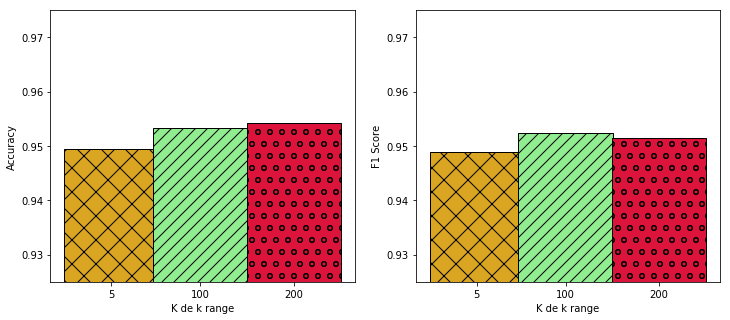

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
n = [5,100,200]
acc_K_ = [acc_K_5[0][0], acc_K_100[0][0], acc_K_200[0][0]]
rects1 = ax[0].bar(n[0], acc_K_5[0][0], width=100.50 ,color='goldenrod', hatch="x", edgecolor='black')
rects1 = ax[0].bar(n[1], acc_K_100[0][0], width=100.50 ,color='lightgreen', hatch="//", edgecolor='black')
rects1 = ax[0].bar(n[2], acc_K_200[0][0], width=100.50 ,color='crimson', hatch="o", edgecolor='black')
ax[0].set_xticks(n)
ax[0].set_ylim(0.925, 0.975)
ax[0].set_xlabel("K de k range")
ax[0].set_ylabel("Accuracy")
rects2 = ax[1].bar(n[0], f1_K_5[0][0], width=100.50 ,color='goldenrod', hatch="x", edgecolor='black')
rects2 = ax[1].bar(n[1], f1_K_100[0][0], width=100.50 ,color='lightgreen', hatch="//", edgecolor='black')
rects3 = ax[1].bar(n[2], f1_K_200[0][0], width=100.50 ,color='crimson', hatch="o", edgecolor='black')
ax[1].set_xticks(n)
ax[1].set_ylim(0.925, 0.975)
ax[1].set_xlabel("K de k range")
ax[1].set_ylabel("F1 Score")
ax[1].plot()